# Exploring Jane Addams Letters 1901-1927

### MATH-390 | 01 | ADV TOPICS: NETWORK SCIENCE | Professor Beecher

### Tina Nosrati
### 11/30/2024


In [33]:
#packages
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.colors as mcolors


# Data Preprocessing

In [4]:
#loading text processing essentials
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#defining text procesign functions
def remove_signs(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

def lowercase_text(text):
    return text.lower()

def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

def apply_stemming(text):
    tokens = word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in tokens])

def apply_lemmatization(text):
    tokens = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

def preprocess_text(text):
    text = remove_signs(text)
    text = lowercase_text(text)
    text = remove_stopwords(text)
    text = apply_stemming(text)
    text = apply_lemmatization(text)
    return text

In [6]:
#reading the data and keeping the necessary columns
df=pd.read_csv("dataset.csv")
df.head()
df_text=df[['Identifier','Title','Subject','Date','Text', 'locations', 'tags']]
df_text=df_text.dropna()
#apply test preprocesing
df_text['Text'] = df_text['Text'].apply(preprocess_text)


In [11]:
#removing letters with tags repeated less then 10 times
df_text.tags.value_counts()
tags_to_keep = df_text['tags'].value_counts()[df_text['tags'].value_counts() >= 10].index
df_text = df_text[df_text['tags'].isin(tags_to_keep)]
df_text

,Identifier,Title,Subject,Date,Text,locations,tags
0,43341,"Jane Addams to Zonja Wallin Lawrence, May 7, 1929","Hull-House, support for;Addams, Jane, gratitude",1927-05-07,hullhous 800 south halst street chicago dear m...,"41.8716164,-87.6474573",Hull-House;Thanks
19,42487,"Jane Addams to Dorothy Detzer, ca. October 2, ...",Women's International League for Peace and Fre...,1926-10-02,woman intern leagu peac freedom intern offic g...,"41.8781136,-87.6297982",Finances;Peace
20,42486,"Jane Addams to Hannah Clothier Hull, ca. Octob...","Addams, Jane, requests from;Addams, Jane, and ...",1926-10-02,woman intern leagu peac freedom intern offic g...,"41.8781136,-87.6297982",Peace;Requests
21,42485,"Jane Addams to Myra Harriet Reynolds Linn, Sep...","Addams, Jane, and family",1926-09-27,12 west walton place sept 271926 dear myra sen...,"41.9001602,-87.6290308",Family
24,42466,"Jane Addams to Madeleine Zabriskie Doty, Augus...","Addams, Jane, requests from;Women's Internatio...",1926-08-31,dear madelein doti note given cours know noth ...,"46.2043907,6.1431577",Peace;Requests
...,...,...,...,...,...,...,...
3888,103,"Jane Addams to Richard Theodore Ely, February ...","Addams, Jane, requests from;Hull-House, visits to",1901-02-26,hullhous 335 south halst street chicago dear m...,"41.8716782,-87.6474517",Hull-House Visits;Requests
3893,76,"Jane Addams to Florence Kelley, February 10, 1901","Addams, Jane, relationship with Florence Kelle...",1901-02-10,hullhous 335 south halst street chicago dear s...,"41.8716782,-87.6474517",Friends
3897,63,"Jane Addams to Sarah Alice Addams Haldeman, Ja...","Addams, Jane, and family",1901-01-30,hullhous 335 south halst street chicago dear a...,"41.8716782,-87.6474517",Family
3898,59,"Jane Addams to Anita McCormick Blaine, January...","Addams, Jane, writing",1901-01-17,hullhous 335 south halst street chicago dear m...,"41.8716782,-87.6474517",Lectures


In [12]:
#saving cleaned data
df_text.to_csv("cleaned_data.csv")

# Vectorization and cosine similarity

In [16]:
#TFIDF vectorization and cosine similarity
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_text['Text'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_text.index, columns=df_text.index)
cosine_sim_df.head()

,0,19,20,21,24,26,27,28,31,32,...,3880,3884,3885,3886,3887,3888,3893,3897,3898,3899
0,1.000000,0.012620,0.024826,0.056423,0.012562,0.039701,0.025855,0.099367,0.075043,0.192126,...,0.060667,0.114731,0.078506,0.027531,0.058730,0.053904,0.040873,0.068374,0.084395,0.079562
19,0.012620,1.000000,0.326579,0.035159,0.092879,0.080184,0.106788,0.031442,0.024691,0.006131,...,0.016347,0.020579,0.010431,0.020009,0.059963,0.017316,0.049988,0.033943,0.018674,0.026327
20,0.024826,0.326579,1.000000,0.011487,0.050123,0.069155,0.089222,0.021365,0.009146,0.007313,...,0.033850,0.017026,0.035738,0.020029,0.013412,0.030342,0.012587,0.006809,0.025429,0.032925
21,0.056423,0.035159,0.011487,1.000000,0.009078,0.022696,0.064211,0.030772,0.007412,0.006897,...,0.016334,0.022219,0.029888,0.050544,0.004220,0.020164,0.021802,0.065952,0.020162,0.048294
24,0.012562,0.092879,0.050123,0.009078,1.000000,0.041331,0.122154,0.092988,0.037001,0.067782,...,0.009268,0.014208,0.010382,0.005329,0.007463,0.006256,0.009948,0.033223,0.012892,0.006852


In [19]:
#similarity stats
similarity_scores = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]

mean_similarity = np.mean(similarity_scores)
median_similarity = np.median(similarity_scores)
min_similarity = np.min(similarity_scores)
max_similarity = np.max(similarity_scores)
std_dev_similarity = np.std(similarity_scores)

print("Mean Similarity:", mean_similarity)
print("Median Similarity:", median_similarity)
print("Minimum Similarity:", min_similarity)
print("Maximum Similarity:", max_similarity)
print("Standard Deviation of Similarity:", std_dev_similarity)

Mean Similarity: 0.05062765117843389
Median Similarity: 0.04375242524941818
Minimum Similarity: 0.0
Maximum Similarity: 0.962213410843583
Standard Deviation of Similarity: 0.03678415311058334


Mean Similarity (0.05):

On average, documents in the dataset have low similarity to each other. This low value suggests that most documents cover distinct content or themes.

Median Similarity (0.043):

The median being close to the mean further supports the idea that the majority of document pairs are not highly similar.

Standard Deviation (0.03):

A low standard deviation suggests that the similarity scores do not vary widely from the mean. This reinforces the finding that most documents have low similarity to each other, with few outliers.

# Setting threshold for similarity

#### T= mean similarity + k * standard deviation similarity

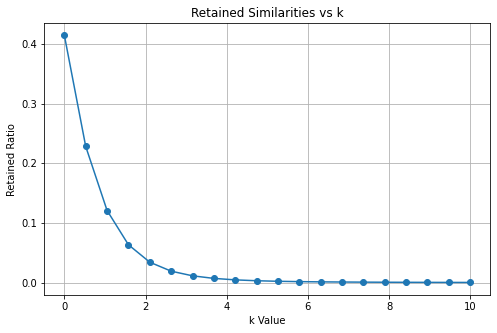

In [27]:
#estimate the best k value
k_values = np.linspace(0, 10, 20) 
retained_ratios = []

for k in k_values:
    threshold = mean_similarity + k * std_dev_similarity
    retained = similarity_scores[similarity_scores > threshold]
    retained_ratio = len(retained) / len(similarity_scores)
    retained_ratios.append(retained_ratio)

plt.figure(figsize=(8, 5))
plt.plot(k_values, retained_ratios, marker='o')
plt.title("Retained Similarities vs k")
plt.xlabel("k Value")
plt.ylabel("Retained Ratio")
plt.grid()
plt.show()


In [59]:
k=5
similarity_threshold = mean_similarity + k * std_dev_similarity
print("Similarity Threshold:", similarity_threshold)

Similarity Threshold: 0.23454841673135057


In [61]:
cosine_sim_df = pd.DataFrame(cosine_sim)

mask = (cosine_sim_df > similarity_threshold) & np.triu(np.ones(cosine_sim_df.shape), k=1).astype(bool)

similarity_df = cosine_sim_df.where(mask).stack().reset_index()
similarity_df.columns = ['Row1', 'Row2', 'Similarity']

similarity_df = similarity_df.sort_values(by='Similarity', ascending=False)

print("Top Similar Pairs:")
print(similarity_df)

Top Similar Pairs:
      Row1  Row2  Similarity
1005   316   319    0.962213
489    116   238    0.940667
808    237   239    0.926827
1012   319   335    0.880978
793    235   237    0.875972
...    ...   ...         ...
1197   397   402    0.234676
962    306   463    0.234624
1550   534   558    0.234589
1789   736   741    0.234570
1364   478   525    0.234555

[2255 rows x 3 columns]


In [62]:
similarity_df.to_csv("similarity_df_draft1.csv")

# Network Analysis

In [63]:
similarity_df.rename(columns={similarity_df.columns[0]: 'Letter_A', similarity_df.columns[1]: 'Letter_B'}, inplace=True)
similarity_df

,Letter_A,Letter_B,Similarity
1005,316,319,0.962213
489,116,238,0.940667
808,237,239,0.926827
1012,319,335,0.880978
793,235,237,0.875972
...,...,...,...
1197,397,402,0.234676
962,306,463,0.234624
1550,534,558,0.234589
1789,736,741,0.234570


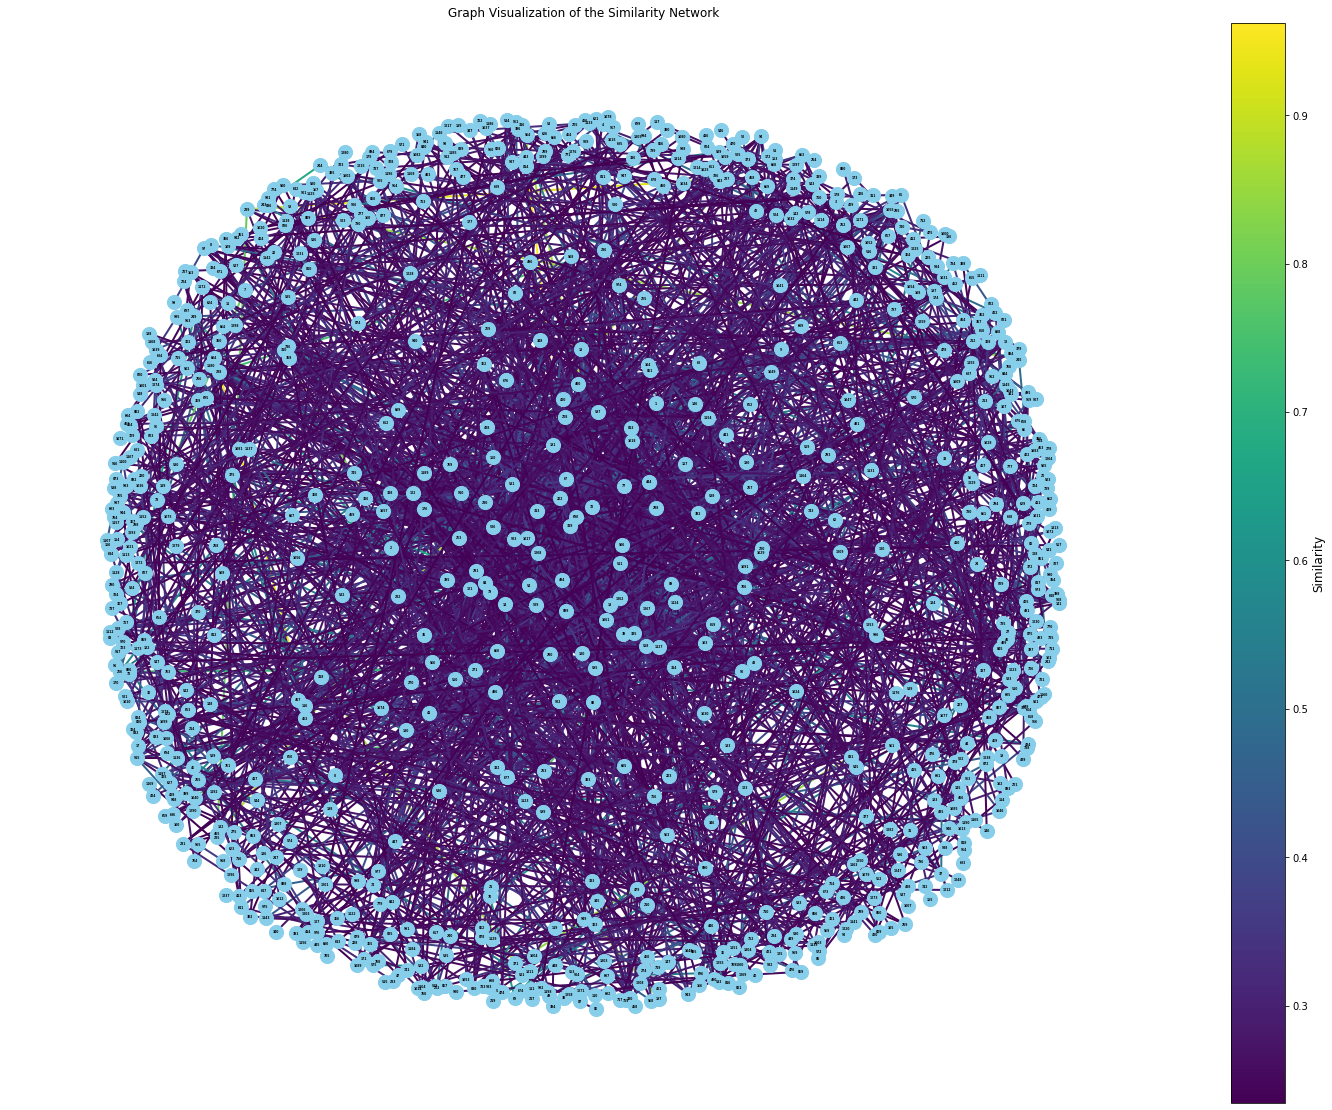

In [70]:
G = nx.from_pandas_edgelist(similarity_df, source='Letter_A', target='Letter_B', edge_attr='Similarity')
pos = nx.spring_layout(G, seed=42, k=0.8) 

weights = [d['Similarity'] for _, _, d in G.edges(data=True)]

norm = plt.Normalize(vmin=min(weights), vmax=max(weights))
colors = plt.cm.viridis(norm(weights))


plt.figure(figsize=(20, 15))
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=colors, width=2, node_size=200, font_size=3, font_weight='bold')


sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Similarity', fontsize=12)

plt.title("Graph Visualization of the Similarity Network")
plt.show()
